In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Undestanding

In [6]:
titanic.isnull().sum()  #if 50% data is missing, drop that column

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

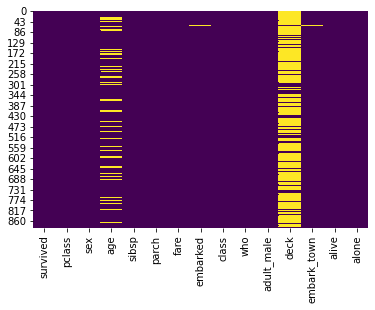

In [7]:
sns.heatmap(titanic.isnull(), cbar=False, cmap = 'viridis')

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

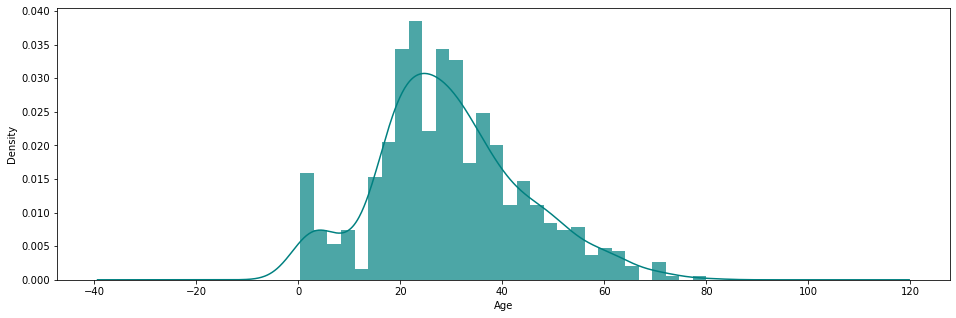

In [9]:
ax = titanic['age'].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.7, figsize=(16,5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

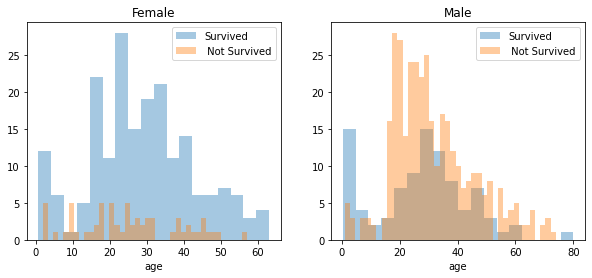

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']
women
ax = sns.distplot(women[women['survived'] == 1].age.dropna(), bins = 18, label = 'Survived',ax = axes[0], kde = False)
ax = sns.distplot(women[women['survived'] == 0].age.dropna(), bins = 40, label = ' Not Survived',ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['survived'] == 1].age.dropna(), bins = 18, label = 'Survived',ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived'] == 0].age.dropna(), bins = 40, label = ' Not Survived',ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

## Filling data in Age col using Pclass

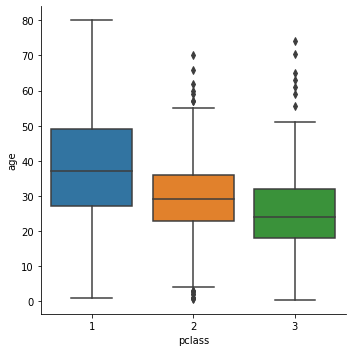

In [11]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

In [12]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [13]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [14]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [15]:
def filling_age_col(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age
    

In [16]:
titanic['age'] = titanic[['age', 'pclass']].apply(filling_age_col, axis = 1)

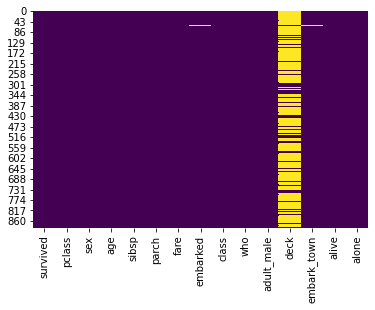

In [17]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

## Analysing Embarked

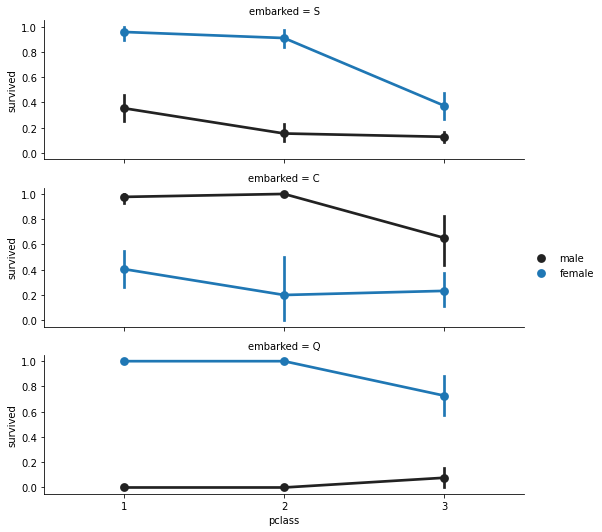

In [18]:
f = sns.FacetGrid(titanic, row = 'embarked',height = 2.5, aspect = 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [19]:
titanic['embarked'].isnull().sum()

2

In [20]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [21]:
titanic['embarked'].fillna('S', inplace=True)

In [22]:
titanic['embarked'].isnull().sum()

0

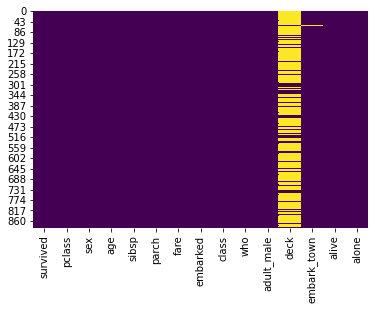

In [23]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

## Filtering Data

In [24]:
titanic.drop(columns = ['class', 'who', 'deck', 'embark_town', 'alive'], inplace = True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,True,False
1,1,1,female,38.0,1,0,71.2833,C,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,True


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [26]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1}).astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['fare'] = titanic['fare'].astype('int')
titanic['embarked'] = titanic['embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,True,False
1,1,1,1,38,1,0,71,1,False,False
2,1,3,1,26,0,0,7,0,False,True
3,1,1,1,35,1,0,53,0,False,False
4,0,3,0,35,0,0,8,0,True,True
5,0,3,0,25,0,0,8,2,True,True
6,0,1,0,54,0,0,51,0,True,True
7,0,3,0,2,3,1,21,0,False,False
8,1,3,1,27,0,2,11,0,False,False
9,1,2,1,14,1,0,30,1,False,False


In [27]:
titanic['adult_male'] = titanic['adult_male'].map({True:1, False:0}).astype('int')
titanic['alone'] = titanic['alone'].map({True:1, False:0}).astype('int')
# titanic['who'] = titanic['who'].map({'child':0, 'man':1, 'woman':2}).astype('int')

In [28]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1
5,0,3,0,25,0,0,8,2,1,1
6,0,1,0,54,0,0,51,0,1,1
7,0,3,0,2,3,1,21,0,0,0
8,1,3,1,27,0,2,11,0,0,0
9,1,2,1,14,1,0,30,1,0,0


## Train the Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [31]:
X_train.shape

(596, 9)

In [32]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [33]:
model.score(X_test, y_test)

0.8271186440677966

## Lets increase the accuracy..

In [34]:
from sklearn.feature_selection import RFE

In [35]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose = 1)  # verbose means in each iteration it will remove only 1 feature.
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [36]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [37]:
X.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1


In [38]:
X1 = X[X.columns[rfe.support_]]

In [39]:
X1.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 0, stratify = y)

In [41]:
X_train.shape

(712, 5)

In [42]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [43]:
model.score(X_test, y_test)

0.8100558659217877

## ROC Curve

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [45]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [46]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [47]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)
print(fpr)
print(tpr)
print(thr)

[0.         0.         0.         0.         0.         0.
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.04545455 0.06363636 0.10909091 0.10909091 0.10909091
 0.11818182 0.15454545 0.24545455 0.26363636 0.27272727 0.29090909
 0.40909091 0.41818182 0.44545455 0.44545455 0.46363636 0.47272727
 0.50909091 0.52727273 0.93636364 0.95454545 0.95454545 0.96363636
 0.98181818 1.        ]
[0.         0.02898551 0.11594203 0.14492754 0.24637681 0.27536232
 0.27536232 0.28985507 0.34782609 0.39130435 0.4057971  0.43478261
 0.44927536 0.46376812 0.52173913 0.60869565 0.65217391 0.69565217
 0.69565217 0.71014493 0.8115942  0.8115942  0.82608696 0.82608696
 0.84057971 0.84057971 0.84057971 0.85507246 0.85507246 0.85507246
 0.86956522 0.86956522 0.98550725 0.98550725 1.         1.
 1.         1.        ]
[1.95064969e+00 9.50649692e-01 9.35282517e-01 9.33395618e-01
 9.30287098e-01 9.13146568e-01 8.84375261e-01 8.76942124e-01
 8.31555599e-01 7.95476591e-01 7.38872412e

In [48]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Log loss: ', log_loss(y_test, y_predict_prob))
print('AUC: ', auc(fpr, tpr))

Accuracy:  0.8100558659217877
Log loss:  0.45916355823464355
AUC:  0.8343873517786562


In [49]:
idx = np.min(np.where(tpr>0.95))
idx

32

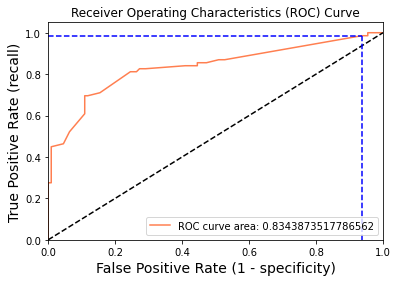

Using a threshold of 0.079 gaurantees a sensitivity of 0.986 and a specificity of 0.064, i.e. a false positive rate of 93.64%.


In [50]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC curve area: '+ str(auc(fpr, tpr)))  # red line
plt.plot([0,1],[0,1], 'k--')  #diagonal line
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')  #horizontal blue line
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color = 'blue')  #vertical blue line

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Using a threshold of %.3f ' % thr[idx] + 'gaurantees a sensitivity of %.3f ' % tpr[idx] +
     'and a specificity of %.3f' % (1-fpr[idx]) +
     ', i.e. a false positive rate of %.2f%%.' % (np.array(fpr[idx])*100))